In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# random booj du liệu bất kì để tuyến tính  y =2x+3 +<random variables>
# rng= np.random.RandomState(1)
#x= 10*rng.rand(50)
# y= 2x -5 + rng.randn(50)
# plot scatter(x,y)
# tìm đường thẳng đẻ dự đoán
# plot all


# 2 cách
# tìm lost function để tìm a,b (x,y) bằng tay ok hơn, bằng thư viện
# import thư viện Linear Regression





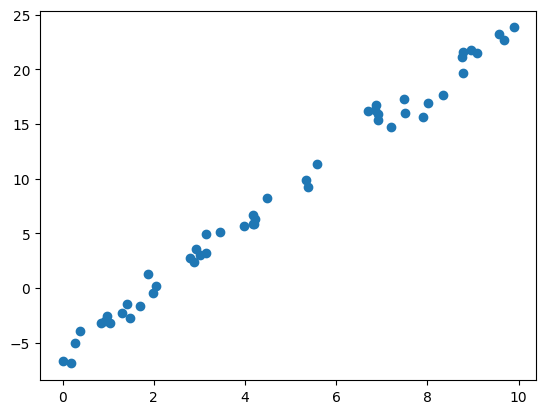

In [4]:
rng= np.random.RandomState(1)
x = 10*rng.rand(50)
y = 3*x -6 + rng.randn(50)

plt.scatter(x,y)


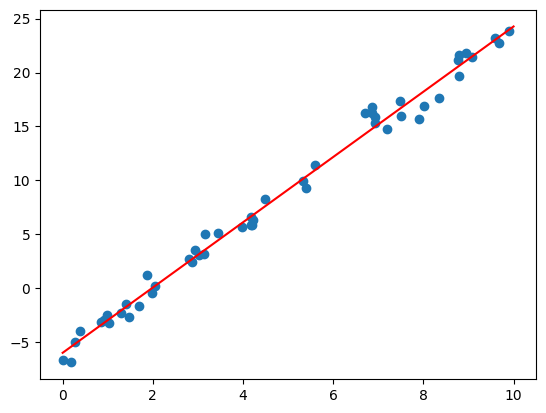

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept =True)
model.fit(x[:, np.newaxis],y)
xfit = np.linspace(0,10,1000)
yfit =model.predict(xfit[:,np.newaxis])

plt.scatter(x,y)
plt.plot(xfit,yfit, color='red')

In [ ]:
print("model slope ", )

Hệ số hồi quy tuyến tính: y = -6.00 + 3.03x


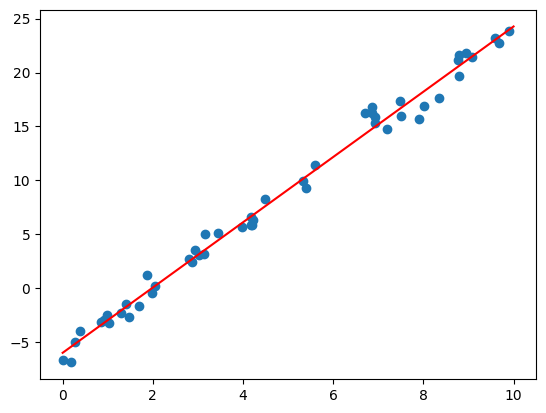

In [7]:
# Tính số lượng mẫu
n = len(x)

# Tính tổng các giá trị x, y, x^2, xy
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x_squared = np.sum(x**2)
sum_xy = np.sum(x*y)

# Tính hệ số hồi quy b1 và b0
b1 = (n * sum_xy - sum_x * sum_y) / (n * sum_x_squared - sum_x**2)
b0 = (sum_y - b1 * sum_x) / n

# In kết quả
print(f"Hệ số hồi quy tuyến tính: y = {b0:.2f} + {b1:.2f}x")

# Dự đoán các giá trị y với x mới
x_new = np.linspace(0, 10, 1000)
y_new = b0 + b1 * x_new

# Vẽ đồ thị
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.plot(x_new, y_new, color='red')
plt.show()

mô hình đa biến, tuyen tinh don, da chieu


Polynomial basis function

In [20]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2,3,4])
poly = PolynomialFeatures(3, include_bias = False)
poly.fit_transform(x[:,None])


array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [21]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),LinearRegression())

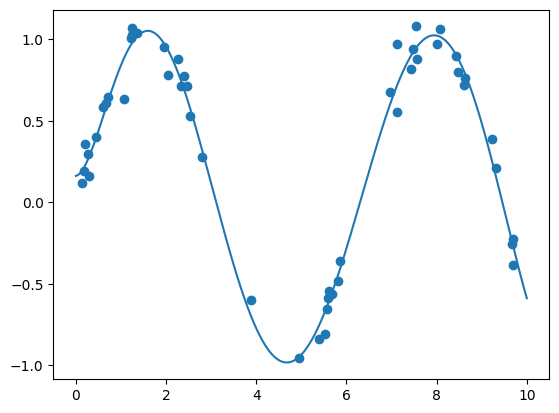

In [22]:
tng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:,np.newaxis],y)
xfit=np.linspace(0,10,1000)
yfit= poly_model.predict(xfit[:,np.newaxis])
plt.scatter(x,y)
plt.plot(xfit,yfit)

In [23]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

def loss_function(y_true, y_predicted):

	# Calculating the loss or cost
	cost = np.sum((y_true - y_predicted))/(len(y_true))
	return cost

def gradient_descent(x, y, iterations = 1000, learning_rate = 0.008,
					stopping_threshold = 1e-6):

	# Initializing weight, bias, learning rate and iterations
	current_weight = 0.1
	current_bias = 0.01
	iterations = iterations
	learning_rate = learning_rate
	n = float(len(x))

	costs = []
	weights = []
	previous_cost = None

	# Estimation of optimal parameters
	for i in range(iterations):

		# Making predictions
		y_predicted = (current_weight * x) + current_bias

		# Calculating the current cost
		current_cost = loss_function(y, y_predicted)

		# If the change in cost is less than or equal to
		# stopping_threshold we stop the gradient descent
		if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
			break

		previous_cost = current_cost

		costs.append(current_cost)
		weights.append(current_weight)

		# Calculating the gradients
		weight_derivative = -(1/n) * sum(x * (y-y_predicted))
		bias_derivative = -(1/n) * sum(y-y_predicted)

		# Updating weights and bias
		current_weight = current_weight - (learning_rate * weight_derivative)
		current_bias = current_bias - (learning_rate * bias_derivative)

	return current_weight, current_bias

In [ ]:
def main():

	# Estimating weight and bias using gradient descent
	estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=1000)
	print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

	# Making predictions using estimated parameters
	Y_pred = estimated_weight*X + estimated_bias

	# Plotting the regression line
	plt.figure(figsize = (8,6))
	plt.scatter(X, Y, marker='o', color='red')
	plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
			markersize=10,linestyle='dashed')
	plt.xlabel("X")
	plt.ylabel("Y")
	plt.show()


if __name__=="__main__":
	main()